# Logistic Regression And Classification

## Classification

Classification is a fundamental task in supervised machine learning that involves predicting a categorical label for a given input based on its features. The goal of classification is to assign inputs to predefined classes using patterns learned from labeled training data.

There are various classification methods, each suitable for different types of data and problems. Some widely used methods include:

- **Logistic Regression:** A linear model that predicts the probability of an input belonging to a particular class using a logistic function.
- **Decision Trees:** Models that split data into subsets based on feature values, forming a tree structure to classify inputs.
- **Support Vector Machines (SVM):** Models that find a hyperplane to separate classes with the largest margin.
- **k-Nearest Neighbors (k-NN):** A non-parametric method that classifies an input based on the majority class of its nearest neighbors.
- **Naive Bayes:** A probabilistic model based on Bayes' theorem with the assumption of feature independence.
- **Neural Networks:** Complex models capable of capturing non-linear relationships in data, often used for large-scale problems.

## Types of Classification

### Binary Classification

**Binary classification** is the simplest form of classification, where there are only two possible classes to predict. 

The model is tasked with distinguishing between these two categories, such as predicting whether an email is spam or not spam, or whether a medical test result is positive or negative. The output is a single class label, with models typically returning a probability that the input belongs to one of the classes. If the probability exceeds a certain threshold (commonly 0.5), the input is classified into the positive class; otherwise, it is assigned to the negative class.

Binary classification is straightforward, with models usually learning a single decision boundary that separates the two classes.


### Multi-Class Classification

**Multi-class classification** extends binary classification to problems where there are more than two classes. In this, the model must predict one out of a set of possible classes, and each input is assigned to exactly one class. 

Examples include recognizing handwritten digits (0-9) or classifying an animal as a dog, cat, or bird. Unlike binary classification, where a decision boundary separates two classes, multi-class problems often require more complex decision boundaries to separate multiple classes.

A common approach to solving multi-class classification problems is to use methods like **One-vs-Rest (OvR)** or **Multinomial Logistic Regression**. OvR involves training multiple binary classifiers, each one distinguishing one class from all others, while multinomial logistic regression models the relationships between all classes simultaneously.


### Multi-Label Classification (k-Way Classification)

**Multi-label classification**, often referred to as **k-way classification**, is a problem where each input can be assigned to multiple classes simultaneously, rather than just one. This differs from multi-class classification, where each input belongs to exactly one class. 

Multi-label classification is common in scenarios like text categorization, where a document might belong to multiple categories (e.g., a news article could be about politics, economics, and international relations at the same time). It’s also found in image tagging, where a single image can have multiple labels such as "outdoor", "sunny", and "mountain".

In multi-label classification, models are typically trained to predict multiple binary outcomes, each corresponding to a different label. This is often implemented using a technique like One-vs-Rest (OvR) for each label or methods like binary cross-entropy loss  to handle multiple labels.

Multi-label classification (k-way) deals with situations where each input can belong to multiple classes and as such the model outputs multiple predictions, which are often treated as independent binary classification tasks for each class.

![](https://miro.medium.com/v2/resize:fit:972/1*SwXHlCzh-d9UqHOglp3vcA.png)

## Logistic Regression

Logistic regression is one of the simplest and most commonly used methods for binary classification. Despite its name, it is not a regression algorithm but rather a classification technique. It predicts the probability that an instance belongs to a specific class and uses this probability to make a classification decision.

Logistic regression models the relationship between the input features and the probability of the target class using the logistic (or sigmoid) function. This function maps any real-valued number to a range between 0 and 1, making it ideal for modeling probabilities. The decision boundary in logistic regression is linear, making it effective for problems where the classes are linearly separable.

In a binary classification scenario, the predicted probability is compared to a threshold (commonly 0.5) to determine the class label. For example, if the predicted probability of a sample belonging to the positive class is greater than or equal to 0.5, it is classified as positive; otherwise, it is classified as negative.

Logistic regression is particularly valuable because it is interpretable, computationally efficient, and serves as a foundation for understanding more advanced classification algorithms.

![](https://miro.medium.com/v2/resize:fit:1400/0*VkKvoiB4zD-P7yKa.gif)

## Logistic Regression Modern Example

#### Loading The Data

In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# For simplicity, let's focus on binary classification (class 0 vs. class 1)
X_binary = X[y != 2]  # Select classes 0 and 1
y_binary = y[y != 2]  # Corresponding labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)


#### Building The Model

In [2]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

#### Evaluating The Model

In [3]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



#### Examining Predictions

In [4]:
# Predict probabilities for the first few test samples
probabilities = model.predict_proba(X_test[:5])
print("\nPredicted Probabilities for the first 5 test samples:")
print(probabilities)

# Display the predicted classes for the first few test samples
predicted_classes = model.predict(X_test[:5])
print("\nPredicted Classes for the first 5 test samples:")
print(predicted_classes)



Predicted Probabilities for the first 5 test samples:
[[0.00118085 0.99881915]
 [0.01580857 0.98419143]
 [0.00303433 0.99696567]
 [0.96964813 0.03035187]
 [0.94251523 0.05748477]]

Predicted Classes for the first 5 test samples:
[1 1 1 0 0]


## Logistic Regression From Scratch

#### Loading The Data

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Focus on binary classification (e.g., classes 0 and 1)
X_binary = X[y != 2]  # Exclude class 2
y_binary = y[y != 2]  # Labels for classes 0 and 1

# Add a bias term to X -- This differs from above and is needed for the by hand approach.
X_binary = np.c_[np.ones((X_binary.shape[0], 1)), X_binary]  # Add bias term (x0 = 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

#### Initializing The Parameters

In [6]:
# Initialize parameters
theta = np.zeros(X_train.shape[1])
learning_rate = 0.1
num_iterations = 1000

#### Setting Up Modeling Functions

In [7]:
# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define loss function (cross-entropy loss)
def compute_loss(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    loss = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return loss

# Define gradient function
def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    gradient = (1 / m) * X.T @ (h - y)
    return gradient

#### Doing Gradient Descent To Find Best Model

In [8]:
# Gradient Descent
loss_history = []
for i in range(num_iterations):
    gradient = compute_gradient(X_train, y_train, theta)
    theta -= learning_rate * gradient
    loss = compute_loss(X_train, y_train, theta)
    loss_history.append(loss)
    if i % 100 == 0:  # Print loss every 100 iterations
        print(f"Iteration {i}: Loss = {loss:.4f}")

Iteration 0: Loss = 0.6381
Iteration 100: Loss = 0.0688
Iteration 200: Loss = 0.0362
Iteration 300: Loss = 0.0248
Iteration 400: Loss = 0.0190
Iteration 500: Loss = 0.0155
Iteration 600: Loss = 0.0131
Iteration 700: Loss = 0.0113
Iteration 800: Loss = 0.0100
Iteration 900: Loss = 0.0090


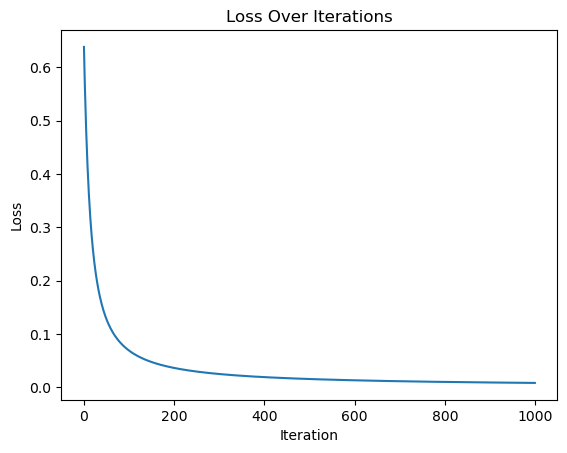

In [9]:
# Plot loss history
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Over Iterations')
plt.show()

#### Making Predictions On Test Set

In [10]:
# Predictions on test set
def predict(X, theta, threshold=0.5):
    probabilities = sigmoid(X @ theta)
    return (probabilities >= threshold).astype(int)

y_pred = predict(X_test, theta)

#### Evaluating The Model

In [11]:
# Evaluate the model
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 1.00


#### Plotting The Decision Boundary

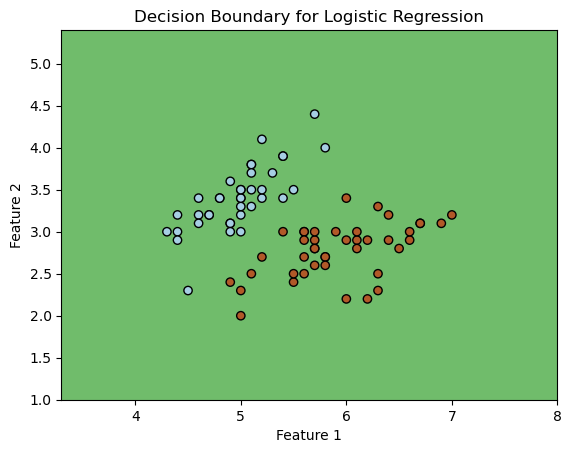

In [12]:
# Plot the decision boundary
def plot_decision_boundary(X, y, theta):
    # Generate a grid of values
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x2_min, x2_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                           np.linspace(x2_min, x2_max, 100))
    
    # Compute predictions for each point in the grid
    X_grid = np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel(), 
                   np.zeros((xx1.ravel().shape[0], X.shape[1] - 3))]  # Add extra columns if needed
    y_grid_pred = predict(X_grid, theta).reshape(xx1.shape)
    
    # Plot decision boundary
    plt.contourf(xx1, xx2, y_grid_pred, alpha=0.7, cmap=plt.cm.Paired)
    plt.scatter(X[:, 1], X[:, 2], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary for Logistic Regression")
    plt.show()

# Plot using the training data
plot_decision_boundary(X_train, y_train, theta)

## Logistic Regression and Gradient Descent

**Gradient descent** is an optimization algorithm used to find the values of parameters (coefficients) that minimize the cost function. Since logistic regression relies on a non-linear function (the sigmoid function), finding the optimal parameters requires an iterative approach like gradient descent. Gradient descent is the engine that drives logistic regression, ensuring that the model learns the best possible parameters to separate classes based on the training data. 


### Purpose of Gradient Descent

The goal of logistic regression is to minimize the **cost function**, typically the cross-entropy loss, which measures how well the model’s predicted probabilities align with the actual class labels. 

The cost function is defined as:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$


Where:
- $h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}$ (sigmoid function).
- $m$: Number of training examples.
- $\theta$: Model parameters.

Gradient descent helps adjust $\theta$ iteratively to minimize $J(\theta)$.


### The Gradient Descent Algorithm

Gradient descent updates the model parameters $\theta$ by moving in the direction of the negative gradient of the cost function with respect to $\theta$. The gradient indicates the direction and magnitude of the steepest ascent, so its negative points toward the steepest descent.

The update rule is:

$$
\theta := \theta - \alpha \frac{\partial J(\theta)}{\partial \theta}
$$

Where:
- $\alpha$: Learning rate, controlling the step size.
- $\frac{\partial J(\theta)}{\partial \theta}$: Gradient of the cost function.


### Gradient for Logistic Regression

For logistic regression, the gradient of the cost function with respect to $\theta$ is:

$$
\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m} X^T (h_\theta(X) - y)
$$

Where:
- $X$: Feature matrix (with bias term included).
- $y$: True labels vector.
- $h_\theta(X)$: Predicted probabilities (sigmoid outputs).

This expression calculates how much each parameter needs to change to reduce the cost function.

### Steps in Gradient Descent 
1. **Initialize Parameters**:
   - Start with random or zero values for $\theta$.

2. **Compute Predictions**:
   - Use the current parameters to compute $h_\theta(X)$ (the predicted probabilities).

3. **Calculate the Gradient**:
   - Compute $\frac{1}{m} X^T (h_\theta(X) - y)$.

4. **Update Parameters**:
   - Adjust $\theta$ using $\theta := \theta - \alpha \frac{\partial J(\theta)}{\partial \theta}$.

5. **Iterate**:
   - Repeat steps 2-4 until the parameters converge (changes are small or a predefined number of iterations is reached).

### Role of Learning Rate
The **learning rate** ($\alpha$) controls the size of each step toward minimizing the cost function:

- If $\alpha$ is too large, the algorithm may overshoot the minimum and fail to converge.
- If $\alpha$ is too small, the convergence process becomes slow.

Choosing the right learning rate is crucial for efficient training.


### Stopping Criteria 
Gradient descent can stop when:
- The change in the cost function between iterations is below a predefined threshold.
- A maximum number of iterations is reached.


## Regularization

**Regularization** is a technique used to prevent overfitting by discouraging complex models in logistic regression and other machine learning algorithms. It works by adding a penalty term to the cost function, which limits the magnitude of the model's parameters (weights). This helps ensure the model generalizes well to unseen data, especially in situations where there are many features or limited training samples.

### Types of Regularization

1. **L1 Regularization (Lasso)**:
   - Adds a penalty proportional to the absolute value of the coefficients.
   - Encourages sparsity, often driving some coefficients to zero, which can be useful for feature selection.
   - Penalty term: $$\lambda \sum |\theta_j|$$


2. **L2 Regularization (Ridge)**:
   - Adds a penalty proportional to the square of the coefficients.
   - Encourages small weights without forcing them to be exactly zero, making it suitable when all features are potentially useful.
   - Penalty term: $$\lambda \sum \theta_j^2$$


3. **Elastic Net**:
   - Combines both L1 and L2 penalties.



In logistic regression, the cost function with regularization becomes:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right] + \lambda R(\theta)
$$

Where:
- $R(\theta)$ is the regularization term (L1, L2, or both).
- $\lambda$ is the regularization strength (a hyperparameter).

### Example of Regularization in Logistic Regression

#### Loading The Data

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Focus on binary classification (e.g., classes 0 and 1)
X_binary = X[y != 2]  # Exclude class 2
y_binary = y[y != 2]  # Labels for classes 0 and 1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

#### Logistic Regression With Weak L2 Regularization

In [14]:
# The parameter `C` is the inverse of the regularization strength (smaller values mean stronger regularization)
model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with L2 Regularization:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Check the coefficients
print("Model Coefficients:", model.coef_)
print("\nIntercept:", model.intercept_)

Accuracy with L2 Regularization: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Model Coefficients: [[ 0.45808171 -0.83895654  2.21684247  0.92362595]]

Intercept: [-6.526665]


#### Logistic Regression With Strong L2 Regularization

In [15]:
model_strong = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs', random_state=42)
model_strong.fit(X_train, y_train)

# Predict and evaluate the model with stronger regularization
y_pred_strong = model_strong.predict(X_test)
accuracy_strong = accuracy_score(y_test, y_pred_strong)
print("\nAccuracy with Stronger L2 Regularization:", accuracy_strong)
print("\nClassification Report (Stronger Regularization):\n", classification_report(y_test, y_pred_strong))

# Check the coefficients for stronger regularization
print("Stronger Regularization Coefficients:", model_strong.coef_)
print("\nIntercept (Stronger Regularization):", model_strong.intercept_)


Accuracy with Stronger L2 Regularization: 1.0

Classification Report (Stronger Regularization):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Stronger Regularization Coefficients: [[ 0.31827833 -0.34767248  1.15962905  0.45959982]]

Intercept (Stronger Regularization): [-4.16539827]


## Multi-Class Logistic Regression

While logistic regression is primarily associated with binary classification, it can be extended to handle problems involving more than two classes. This is achieved through strategies that adapt the binary logistic regression framework for multi-class scenarios. Two commonly used approaches are One-vs-Rest (OvR) and Multinomial Logistic Regression.

### One-vs-Rest (OvR)

In the One-vs-Rest approach, separate binary logistic regression models are trained for each class. Each model predicts the probability of a sample belonging to one specific class versus all other classes combined. For a dataset with \(k\) classes, \(k\) binary models are built. During prediction, the class corresponding to the model with the highest probability is selected. OvR is computationally efficient and straightforward to implement, making it a popular choice for extending logistic regression to multi-class problems.

### Multinomial Logistic Regression

Multinomial logistic regression directly models the probability distribution across all classes. Instead of treating each class separately, a single model is trained to estimate the probabilities of all possible classes simultaneously. These probabilities are calculated using the softmax function, which generalizes the logistic function for multi-class settings. The softmax function ensures that the predicted probabilities for all classes sum to 1, allowing the model to output a well-defined probability distribution.

Multinomial logistic regression is particularly suited for problems where class relationships are more complex, as it captures the interdependencies between classes more effectively than OvR.


## One vs. Rest Logistic Regression Example

#### Loading Data

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Building The Model

In [17]:
# Logistic regression for multi-class classification using One-vs-Rest
model = LogisticRegression(multi_class='ovr', solver='lbfgs', random_state=42, max_iter=500)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

#### Evaluating The Model

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("One-vs-Rest Logistic Regression Accuracy:", accuracy)

One-vs-Rest Logistic Regression Accuracy: 0.9666666666666667


In [19]:
# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



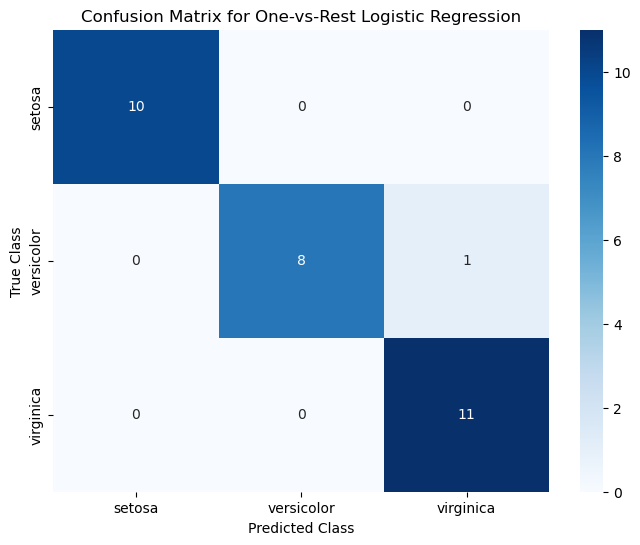

In [20]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix for One-vs-Rest Logistic Regression")
plt.show()


## Multinomial Logistic Regression Example

#### Load The Data

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Build The Model

In [22]:
# Logistic regression for multi-class classification
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, max_iter=500)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

#### Evaluate The Model

In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Multinomial Logistic Regression Accuracy:", accuracy)

Multinomial Logistic Regression Accuracy: 1.0


In [24]:
# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



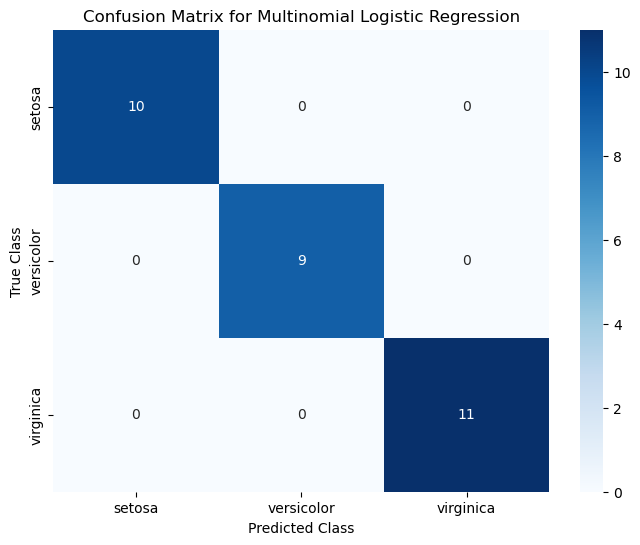

In [25]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix for Multinomial Logistic Regression")
plt.show()

## Multinomial Logistic Regression From Scratch

#### Load The Data

In [26]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# One-hot encode the target labels -- different from other steps as the by hand approach needs starting values.
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Add a bias term to the features -- different from other steps as the by hand approach needs starting values.
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add bias column
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Add bias column

#### Initializing Parameters

In [27]:
# Initialize parameters
num_classes = y_train.shape[1]
num_features = X_train.shape[1]
theta = np.zeros((num_features, num_classes))  # Shape: (num_features, num_classes)
learning_rate = 0.1
num_iterations = 1000

#### Defining The Functions

In [28]:
# Define the softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability improvement
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Define the cross-entropy loss function
def compute_loss(X, y, theta):
    m = X.shape[0]
    logits = X @ theta  # Linear scores
    probs = softmax(logits)  # Predicted probabilities
    loss = -np.sum(y * np.log(probs)) / m
    return loss

# Define the gradient function
def compute_gradient(X, y, theta):
    m = X.shape[0]
    logits = X @ theta
    probs = softmax(logits)
    gradient = (1 / m) * (X.T @ (probs - y))  # Shape: (num_features, num_classes)
    return gradient

#### Doing The Gradient Descent

In [29]:
# Gradient descent
loss_history = []
for i in range(num_iterations):
    gradient = compute_gradient(X_train, y_train, theta)
    theta -= learning_rate * gradient  # Update parameters
    loss = compute_loss(X_train, y_train, theta)
    loss_history.append(loss)
    if i % 100 == 0:
        print(f"Iteration {i}: Loss = {loss:.4f}")

Iteration 0: Loss = 1.0307
Iteration 100: Loss = 0.4636
Iteration 200: Loss = 0.2619
Iteration 300: Loss = 0.2185
Iteration 400: Loss = 0.1909
Iteration 500: Loss = 0.1718
Iteration 600: Loss = 0.1576
Iteration 700: Loss = 0.1468
Iteration 800: Loss = 0.1381
Iteration 900: Loss = 0.1311


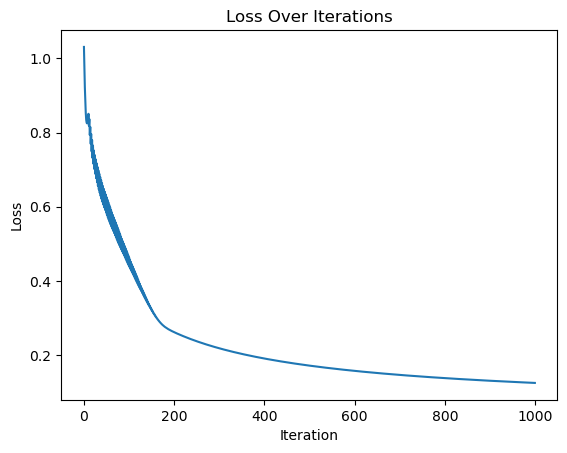

In [30]:
# Plot the loss history
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Over Iterations')
plt.show()

#### Making Predictions

In [31]:
# Predictions
def predict(X, theta):
    logits = X @ theta
    probs = softmax(logits)
    return np.argmax(probs, axis=1)  # Return class with highest probability

y_pred = predict(X_test, theta)
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot to class labels

#### Evaluating The Model

In [32]:
# Evaluate the model
accuracy = np.mean(y_pred == y_test_labels)
print("Test Accuracy:", accuracy)

Test Accuracy: 1.0


## Softmax Function

The **softmax function** is a mathematical function that transforms a vector of real numbers (e.g., raw model outputs or logits) into a probability distribution. 

### What Does the Softmax Function Do?

Given a vector of $ z = [z_1, z_2, ..., z_k] $, where each $ z_i $ is the raw output (logit) for class $ i $ from a model, the softmax function converts these values into a set of probabilities $ p = [p_1, p_2, ..., p_k] $, where each $ p_i $ satisfies:
1. $ p_i \geq 0 $: Probabilities are non-negative.
2. $ \sum_{i=1}^{k} p_i = 1 $: Probabilities sum to 1.

The softmax transformation is defined as:

$$
p_i = \frac{e^{z_i}}{\sum_{j=1}^{k} e^{z_j}}
$$

Here:
- $ e^{z_i} $: Exponentiation ensures all outputs are positive.
- $ \sum_{j=1}^{k} e^{z_j} $: Normalizes the outputs so they sum to 1.

This normalization ensures that the output vector $ p $ can be interpreted as a valid probability distribution over $ k $ classes.

### Role in Multi-Class Logistic Regression

In **multi-class logistic regression**, the softmax function is applied to the raw scores (logits) produced by the model for each class. These logits are the result of a linear transformation of the input features:

$$
z_i = w_i^T x + b_i
$$

Where:
- $ x $: Input feature vector.
- $ w_i $: Weight vector associated with class $ i $.
- $ b_i $: Bias term for class $ i $.

The softmax function then converts the logits $ z_1, z_2, ..., z_k $ into probabilities $ p_1, p_2, ..., p_k $, indicating the likelihood that the input belongs to each class.

The predicted class is typically the one with the highest probability:

$$
\text{Predicted class} = \text{argmax}(p)
$$


### Training with Cross-Entropy Loss

To train a multi-class logistic regression model using softmax, the **cross-entropy loss** is commonly used. The cross-entropy loss measures the difference between the predicted probability distribution (produced by softmax) and the true class distribution (often represented as a one-hot vector). The loss is defined as:

$$
\text{Loss} = - \sum_{i=1}^{k} y_i \log(p_i)
$$

Where:
- $ y_i $: True label for class $ i $ (1 if it's the correct class, 0 otherwise).
- $ p_i $: Predicted probability for class $ i $.

The loss is minimized when the predicted probabilities closely match the true labels, encouraging the model to improve its predictions over time.


## Other Classification Models

### Loading The Data

In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree

#### Building The Model

In [34]:
# Initialize and train the Decision Tree model
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

#### Evaluating The Model

In [35]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 1.0


In [36]:
# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



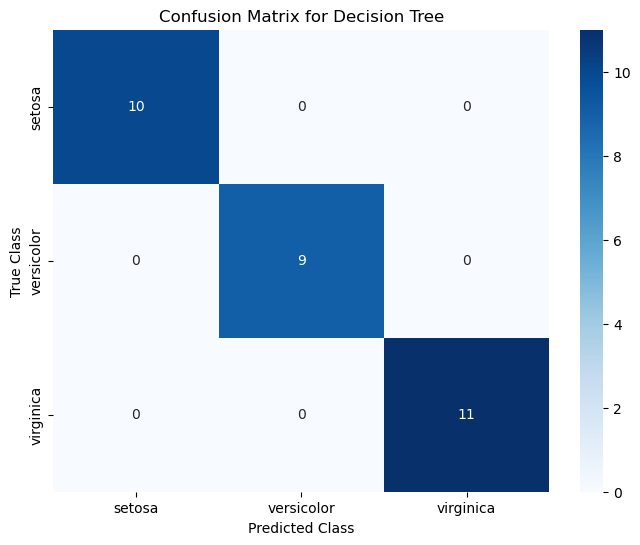

In [37]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

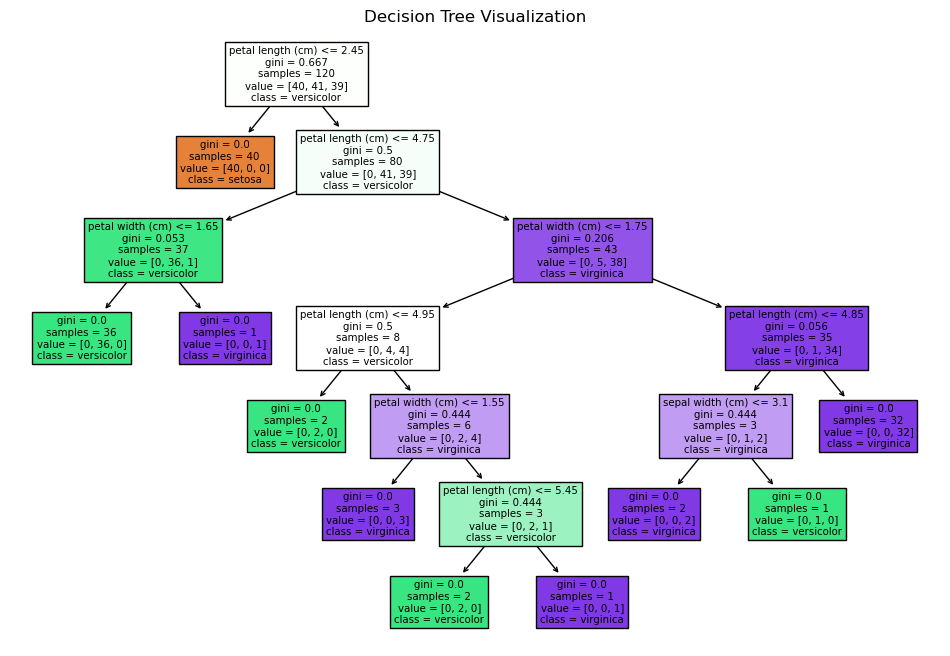

In [38]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

### Support Vector Machine (SVM)

#### Build The Model

In [39]:
# Initialize and train the SVM model
# Use a radial basis function (RBF) kernel by default
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

NameError: name 'SVC' is not defined

#### Evaluate The Model

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

In [ ]:
# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix for SVM")
plt.show()

### Naive Bayes

#### Build The Model

In [ ]:
# Initialize and train the Naive Bayes model
# Using Gaussian Naive Bayes, suitable for continuous data
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

#### Evaluate The Model

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)

In [ ]:
# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix for Naive Bayes")
plt.show()